# IMAGE CLASSIFICATION USING CNN

In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

1. COLLECT AND PREPROCESS LABELED IMAGE DATASETS FROM CIFAR-10

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

* Dataset classes

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

* Plot some image

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

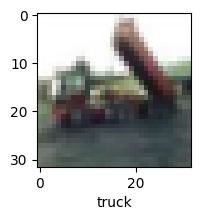

In [12]:
plot_sample(X_train, y_train, 2)

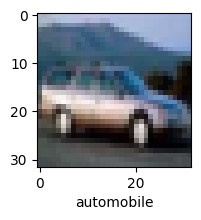

In [13]:
plot_sample(X_train, y_train, 4)

2. Normalizing the training data

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

* Build simple artificial neural network for image classification
  * End of 5epochs, Accuracy is at around 49%

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 247s 117ms/step - accuracy: 0.3057 - loss: 1.9319
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 172s 110ms/step - accuracy: 0.4196 - loss: 1.6457
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 193s 104ms/step - accuracy: 0.4558 - loss: 1.5467
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 104ms/step - accuracy: 0.4804 - loss: 1.4844
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 102ms/step - accuracy: 0.4941 - loss: 1.4347


3. Using metrics like precision, recall, and F1-score

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.58      0.56      1000
           1       0.58      0.67      0.62      1000
           2       0.47      0.11      0.18      1000
           3       0.42      0.20      0.27      1000
           4       0.32      0.61      0.42      1000
           5       0.47      0.33      0.38      1000
           6       0.45      0.63      0.53      1000
           7       0.66      0.43      0.52      1000
           8       0.64      0.60      0.62      1000
           9       0.45      0.66      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



4. Build a deep learning such as convolutional neural network to train our image

In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

with CNN, at the end 5 epochs,accuracy was at around 70% which is significant improvement over ANN.CNN's are best for image classification and gives
superb accuracy.Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features.

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 49ms/step - accuracy: 0.3910 - loss: 1.6795
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.6086 - loss: 1.1083
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6650 - loss: 0.9605
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 48ms/step - accuracy: 0.6972 - loss: 0.8757
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 773s 495ms/step - accuracy: 0.7184 - loss: 0.8050
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 67ms/step - accuracy: 0.7444 - loss: 0.7378
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 57ms/step - accuracy: 0.7646 - loss: 0.6798
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 60ms/step - accuracy: 0.7799 - loss: 0.6326
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 65ms/step - accuracy: 0.7983 - loss: 0.5776
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 51ms/step - accuracy: 0.8111 - loss: 0.5418


5. Evaluate the Model

In [20]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7082 - loss: 0.9227


[0.930763840675354, 0.7049999833106995]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


array([[3.25978617e-03, 8.17536027e-04, 6.30598573e-04, 9.10307348e-01,
        5.15287800e-04, 3.26604322e-02, 4.97577861e-02, 4.33704699e-04,
        1.12312741e-03, 4.94336069e-04],
       [1.00846330e-04, 2.73975241e-03, 5.17409715e-09, 6.08027477e-08,
        2.76181245e-10, 8.09897548e-12, 5.09937925e-10, 2.31461400e-12,
        9.97067273e-01, 9.21550090e-05],
       [9.27672014e-02, 3.62148769e-02, 4.60296840e-04, 2.91432487e-03,
        2.35433166e-04, 2.49941240e-05, 1.57195595e-04, 2.14716070e-04,
        8.53828311e-01, 1.31825591e-02],
       [9.66988623e-01, 5.06144599e-04, 3.71337926e-04, 1.90482915e-05,
        3.06626840e-04, 4.25639328e-08, 9.85747192e-06, 7.92348317e-07,
        3.17885950e-02, 8.99949919e-06],
       [2.41752400e-06, 3.69805675e-05, 8.17013090e-04, 5.53836860e-02,
        2.65950739e-01, 8.68548872e-04, 6.76833391e-01, 1.07761934e-07,
        8.92304452e-05, 1.78847313e-05]], dtype=float32)

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

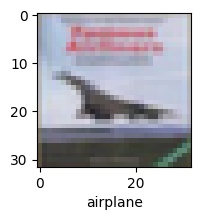

In [24]:
plot_sample(X_test, y_test,3)

In [32]:
classes[y_classes[2]]

'ship'

In [26]:
classes[y_classes[7]]

'frog'

In [27]:
classes[y_classes[3]]

'airplane'